<h1>1.Importing the Libraries</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "svg"

<h3>2.Importing the dataset</h3>

In [2]:
raw_df = pd.read_csv('Zomato_Chennai_Dataset_2020.csv')

In [3]:
raw_df.head()

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


<h3>3. Getting Basic Information about the Dataset</h3>

In [4]:
raw_df.shape

(12032, 12)

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  float64
 7   Dining Rating          6681 non-null   float64
 8   Dining Rating Count    11812 non-null  object 
 9   Delivery Rating        6181 non-null   float64
 10  Delivery Rating Count  11812 non-null  object 
 11  Features               12032 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.1+ MB


In [6]:
raw_df.describe()

,Price for 2,Dining Rating,Delivery Rating
count,12032.000000,6681.000000,6181.000000
mean,397.611370,3.387756,3.805290
std,332.045938,0.558181,0.374213
min,40.000000,0.300000,0.300000
25%,200.000000,3.100000,3.600000
50%,300.000000,3.500000,3.900000
75%,450.000000,3.800000,4.000000
max,5000.000000,4.900000,4.700000


<h3>4. Cleaning the Dataset<h3>

___a.Removing the Null Records___

In [7]:
raw_df.isnull().sum()

Zomato URL                  0
Name of Restaurant          0
Address                     0
Location                    0
Cuisine                     0
Top Dishes                  0
Price for 2                 0
Dining Rating            5351
Dining Rating Count       220
Delivery Rating          5851
Delivery Rating Count     220
Features                    0
dtype: int64

In [8]:
# Replacing the other null records with NA
raw_df.fillna('NA', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_680\1701901264.py:2: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NA' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [9]:
# Confirming all the null records are correct
raw_df.isnull().sum()

Zomato URL               0
Name of Restaurant       0
Address                  0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
dtype: int64

In [10]:
# Dropping columns which are not required for further analysis
raw_df.drop(['Zomato URL', 'Address'], axis = 1, inplace=True)

In [11]:
raw_df.head()

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


___b. Converting the DataTypes of numerical columns to numeric dataype___

In [12]:
# Checking for text values in the column before converting it to numeric datatype
raw_df['Dining Rating'].value_counts()

Dining Rating
NA     5351
3.6     584
3.5     553
3.7     525
3.4     500
3.3     463
3.8     460
3.2     433
3.9     379
3.1     363
2.0     354
3.0     302
4.0     288
2.9     257
4.1     221
2.8     192
4.2     142
2.7     138
4.3     105
2.6      99
2.5      71
4.4      61
2.4      46
4.5      36
2.3      32
2.2      20
4.6      17
4.7      12
2.1      10
4.9       7
4.8       4
1.9       3
1.7       2
0.3       1
1.0       1
Name: count, dtype: int64

In [13]:
# Replacing the text values with '0'
raw_df['Dining Rating'].replace(to_replace=['NA'], value='0', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_680\1206726620.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [14]:
raw_df['Delivery Rating'].value_counts()

Delivery Rating
NA     5851
3.9    1383
3.8     701
4.0     570
3.7     559
4.1     468
3.6     465
4.2     401
3.5     314
4.3     277
3.4     259
3.3     189
4.4     128
3.2      93
3.1      79
3.0      63
4.5      55
2.9      39
2.8      26
4.6      24
2.7      19
2.6      17
2.5       9
0.3       8
2.4       7
2.3       5
2.2       5
2.0       5
1.8       5
4.7       4
2.1       2
1.6       1
1.5       1
Name: count, dtype: int64

In [15]:
# Replacing the text values with '0'
raw_df['Delivery Rating'].replace(to_replace=['NA'], value='0', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_680\2725715706.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





___c. Removing the restaurant records whose Rating is 0___

In [16]:
# Finding those restaurant whose has 0 Rating 
#useless_data = raw_df[raw_df["Dining Rating"] == 0] | raw_df[raw_df["Delivery Rating"] == 0]
#raw_df[useless_data] 

___d.Removing Duplicate records___

In [17]:
# Finding all the duplicate rows
raw_df[raw_df.duplicated()]

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
9103,Brownie Heaven,T. Nagar,"['Bakery', ' Desserts', ' Beverages']",Invalid,350.0,0,Not enough Dining Reviews,0,Not enough Delivery Reviews,"['Home Delivery', 'Indoor Seating', 'Desserts ..."
9995,ibaco,Kanchipuram District,['Ice Cream'],Invalid,200.0,0,Not enough Dining Reviews,0,Not enough Delivery Reviews,"['Home Delivery', 'Vegetarian Only', 'Indoor S..."
10534,Cake Waves,Thiruvallur,"['Bakery', ' Fast Food']",Invalid,500.0,0,Not enough Dining Reviews,0,Not enough Delivery Reviews,"['Home Delivery', 'Indoor Seating', 'Desserts ..."
11225,Pizza Square,Thiruvanmiyur,"['Pizza', ' Fast Food']",Invalid,300.0,0,Not enough Dining Reviews,0,Not enough Delivery Reviews,"['Home Delivery', 'Indoor Seating']"
11361,Aavin Parlour,George Town,['Ice Cream'],Invalid,200.0,0,Not enough Dining Reviews,0,Does not offer Delivery,"['Takeaway Only', 'Desserts and Bakes']"
11390,The Cake Point,Mogappair,['Bakery'],Invalid,200.0,0,Not enough Dining Reviews,0,Not enough Delivery Reviews,"['Home Delivery', 'Indoor Seating', 'Desserts ..."
11489,Parantha Pundit,Mogappair,"['North Indian', ' Beverages']",Invalid,200.0,0,Does not offer Dining,0,Not enough Delivery Reviews,['Delivery Only']
11496,Parantha Pundit,Kovalam,"['North Indian', ' Beverages']",Invalid,200.0,0,Does not offer Dining,0,Not enough Delivery Reviews,['Delivery Only']
11553,Leo Coffee,Mylapore,"['Coffee', ' Tea', ' Beverages']",Invalid,250.0,0,Does not offer Dining,0,Not enough Delivery Reviews,['Home Delivery']
11572,Leo Coffee,Anna Nagar East,"['Coffee', ' Tea', ' Beverages']",Invalid,250.0,0,Not enough Dining Reviews,0,Does not offer Delivery,"['Takeaway Only', 'Vegetarian Only']"


In [18]:
# Dropping all the duplicate rows
raw_df = raw_df.drop_duplicates()

In [19]:
raw_df

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"
...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,['Sandwich'],Invalid,350.0,0,NA,0,NA,"['Breakfast', 'Delivery Only']"
12028,CK's Sandwiches,Kolathur,['Sandwich'],Invalid,350.0,0,NA,0,NA,"['Breakfast', 'Delivery Only']"
12029,CK's Sandwiches,Anna Nagar East,['Sandwich'],Invalid,350.0,0,NA,0,NA,"['Breakfast', 'Delivery Only']"
12030,CK's Sandwiches,Ramapuram,['Sandwich'],Invalid,350.0,0,NA,0,NA,"['Breakfast', 'Delivery Only']"


In [20]:
#Remove exact duplicate rows (simple and safe)
raw_df = raw_df.drop_duplicates()

In [21]:
#Quick missing-values report
print("\nMissing values per column:")
print(raw_df.isna().sum())


Missing values per column:
Name of Restaurant       0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
dtype: int64


In [22]:
raw_df

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"
...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,['Sandwich'],Invalid,350.0,0,NA,0,NA,"['Breakfast', 'Delivery Only']"
12028,CK's Sandwiches,Kolathur,['Sandwich'],Invalid,350.0,0,NA,0,NA,"['Breakfast', 'Delivery Only']"
12029,CK's Sandwiches,Anna Nagar East,['Sandwich'],Invalid,350.0,0,NA,0,NA,"['Breakfast', 'Delivery Only']"
12030,CK's Sandwiches,Ramapuram,['Sandwich'],Invalid,350.0,0,NA,0,NA,"['Breakfast', 'Delivery Only']"


In [23]:
raw_df["Dining Rating"].isna().sum()
raw_df["Dining Rating Count"].isna().sum()
raw_df["Delivery Rating"].isna().sum()
raw_df["Delivery Rating Count"].isna().sum()

0

In [32]:
# Finding those restaurant whose has 0 Rating or Votes
raw_df["Dining Rating"] = pd.to_numeric(raw_df["Dining Rating"], errors="coerce")
raw_df["Dining Rating Count"] = pd.to_numeric(raw_df["Dining Rating"], errors="coerce")
raw_df["Delivery Rating"] = pd.to_numeric(raw_df["Dining Rating"], errors="coerce")
raw_df["Delivery Rating Count"] = pd.to_numeric(raw_df["Dining Rating"], errors="coerce")
useless_data = (raw_df['Dining Rating'] == 0.0) | (raw_df['Dining Rating'] == 0) | (raw_df['Dining Rating Count'] == 0.0) | (raw_df['Dining Rating Count'] == 0) | (raw_df['Delivery Rating'] == 0.0) | (raw_df['Delivery Rating'] == 0) | (raw_df['Delivery Rating Count'] == 0.0) | (raw_df['Delivery Rating Count'] == 0) 
raw_df[useless_data]

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
6,Bai Veetu Kalyanam,Navallur,['Biryani'],"['Bread Halwa', ' Mutton Biryani', ' Brinjal G...",350.0,0.0,0.0,0.0,0.0,['Home Delivery']
77,Al Dhareeq Beef Biriyani,Kodambakkam,['Biryani'],['Beef Biryani'],300.0,0.0,0.0,0.0,0.0,['Home Delivery']
106,Twilight Take Out,Nungambakkam,"['North Indian', ' Chinese', ' Rolls', ' Conti...","['Club Sandwich', ' Chicken Tikka Roll', ' Chi...",350.0,0.0,0.0,0.0,0.0,"['Home Delivery', 'Free Parking']"
107,The Red Box,Anna Nagar West,['Chinese'],"['Noodle', ' Chilli Chicken Gravy', ' Dragon C...",200.0,0.0,0.0,0.0,0.0,['Home Delivery']
114,Charminar Biriyani Centre,Royapettah,"['Biryani', ' North Indian']","['Chicken Biryani', ' Bread Halwa', ' Brinjal ...",300.0,0.0,0.0,0.0,0.0,"['Home Delivery', 'Standing Tables']"
...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,['Sandwich'],Invalid,350.0,0.0,0.0,0.0,0.0,"['Breakfast', 'Delivery Only']"
12028,CK's Sandwiches,Kolathur,['Sandwich'],Invalid,350.0,0.0,0.0,0.0,0.0,"['Breakfast', 'Delivery Only']"
12029,CK's Sandwiches,Anna Nagar East,['Sandwich'],Invalid,350.0,0.0,0.0,0.0,0.0,"['Breakfast', 'Delivery Only']"
12030,CK's Sandwiches,Ramapuram,['Sandwich'],Invalid,350.0,0.0,0.0,0.0,0.0,"['Breakfast', 'Delivery Only']"


In [33]:
## Performing Negation of the useless dataset and then storing the correct data back in the raw_df DataFrame
## This permamnently remove the wrong data from the original dataframe
raw_df = raw_df[~useless_data]

In [34]:
raw_df.shape

(6681, 10)

<h1>4. Copying the cleaned data into a new DataFrame</h1>

In [39]:
df = raw_df.copy()

In [40]:
df

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,4.3,4.3,4.3,"['Home Delivery', 'Indoor Seating']"
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,4.4,4.4,4.4,"['Home Delivery', 'Free Parking', 'Table booki..."
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,4.3,4.3,4.3,"['Home Delivery', 'Indoor Seating']"
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,4.0,4.0,4.0,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,4.2,4.2,4.2,"['Home Delivery', 'Indoor Seating']"
...,...,...,...,...,...,...,...,...,...,...
11777,Kekiz The Cake Shop,Choolaimedu,"['Bakery', ' Desserts']",Invalid,450.0,1.0,1.0,1.0,1.0,"['Delivery Only', 'Desserts and Bakes']"
11785,Engineers Kitchen,Ambattur,"['North Indian', ' Chinese', ' Andhra']",Invalid,400.0,2.5,2.5,2.5,2.5,"['Home Delivery', 'Indoor Seating']"
11794,That Juice Shop,Karapakkam,"['Juices', ' Beverages']",Invalid,200.0,3.6,3.6,3.6,3.6,"['Home Delivery', 'Indoor Seating']"
11801,Amma Unavagam,K.K. Nagar,['South Indian'],Invalid,150.0,3.3,3.3,3.3,3.3,"['Breakfast', 'Vegetarian Only', 'Indoor Seati..."


<h1>5. Performing Exploratory Data Analysis</h1>

___Q1.	How many restaurants are there in each location of Chennai for each cuisine?___

In [63]:
# Get unique locations as a DataFrame
locations_df = pd.DataFrame(zomato_df["Location"].unique(), columns=["Location"])

# Show the table
print(locations_df)

                                              Location
0                                           Pallavaram
1                                              Alandur
2                                          Kodambakkam
3                                             Perambur
4                                           Medavakkam
..                                                 ...
259                              Vivira Mall, Navallur
260                             DLF IT Park, Ramapuram
261  RMZ Millenia Business Park, Old Mahabalipuram ...
262                          RK Salai (Cathedral Road)
263                  Chandra Metro Mall, Virugambakkam

[264 rows x 1 columns]


In [64]:
#Create Region Map with Chennai Zones
region_map = {
    # --- Chennai North ---
    "Royapuram": "Chennai North",
    "Perambur": "Chennai North",
    "Tondiarpet": "Chennai North",
    "Washermenpet": "Chennai North",
    "Madhavaram": "Chennai North",
    "Red Hills": "Chennai North",
    "Sowcarpet": "Chennai North",

    # --- Chennai South ---
    "Velachery": "Chennai South",
    "Adyar": "Chennai South",
    "Tambaram": "Chennai South",
    "Sholinganallur": "Chennai South",
    "Perungudi": "Chennai South",
    "Medavakkam": "Chennai South",
    "Thiruvanmiyur": "Chennai South",

    # --- Chennai East ---
    "Besant Nagar": "Chennai East",
    "Teynampet": "Chennai East",
    "Mylapore": "Chennai East",
    "Santhome": "Chennai East",
    "RA Puram": "Chennai East",

    # --- Chennai West ---
    "Anna Nagar": "Chennai West",
    "Koyambedu": "Chennai West",
    "Vadapalani": "Chennai West",
    "Mogappair": "Chennai West",
    "Porur": "Chennai West",
    "Ambattur": "Chennai West",

    # --- Chennai Central ---
    "T. Nagar": "Chennai Central",
    "Nungambakkam": "Chennai Central",
    "Egmore": "Chennai Central",
    "Kilpauk": "Chennai Central",
    "Purasavakkam": "Chennai Central",
    "Choolaimedu": "Chennai Central",

    # --- Outside Chennai ---
    "Mahabalipuram": "Kanchipuram District",
    "Kovalam": "Kanchipuram District",
    "Kelambakkam": "Chengalpattu District",
    "Navallur": "Chengalpattu District"
}


In [65]:
# Map to regions
df["Region"] = df["Location"].map(region_map).fillna("Other Chennai Region")

In [69]:
# Step 1: Make sure Cuisine is a list (if it's still a string of a list)
import ast
def to_list(val):
    try:
        return ast.literal_eval(val) if isinstance(val, str) else val
    except:
        return val

df["Cuisine"] = df["Cuisine"].apply(to_list)


In [70]:
# Step 2: Explode so each cuisine is its own row
df_exploded = df.explode("Cuisine")

In [71]:
# Step 3: Remove extra spaces and NaN cuisines
df_exploded["Cuisine"] = df_exploded["Cuisine"].astype(str).str.strip()
df_exploded = df_exploded[df_exploded["Cuisine"].notna() & (df_exploded["Cuisine"] != "nan")]

In [72]:
# Step 4: Group by Region and cuisine, count restaurants
result = (
    df_exploded.groupby(["Region", "Cuisine"])["Name of Restaurant"]
    .nunique()  # unique restaurants in that location for that cuisine
    .reset_index(name="Restaurant Count")
)

In [73]:
# Step 5: See the result
print(result.head(20))
print("Total rows:", len(result))

                   Region      Cuisine  Restaurant Count
0   Chengalpattu District       Andhra                 5
1   Chengalpattu District      Arabian                 4
2   Chengalpattu District          BBQ                 4
3   Chengalpattu District       Bakery                 3
4   Chengalpattu District    Beverages                15
5   Chengalpattu District      Biryani                23
6   Chengalpattu District       Burger                 1
7   Chengalpattu District         Cafe                 3
8   Chengalpattu District    Chettinad                 6
9   Chengalpattu District      Chinese                35
10  Chengalpattu District     Desserts                 8
11  Chengalpattu District    Fast Food                15
12  Chengalpattu District  Finger Food                 1
13  Chengalpattu District   Hyderabadi                 1
14  Chengalpattu District    Ice Cream                 2
15  Chengalpattu District       Juices                 1
16  Chengalpattu District      

___#visualize the counts as a heatmap___

In [74]:
# Step 6: Create a pivot table for heatmap
pivot_table = result.pivot(index="Cuisine", columns="Region", values="Restaurant Count").fillna(0)

In [75]:
# Step 7: (Optional) show only top cuisines for readability
top_cuisines = result.groupby("Cuisine")["Restaurant Count"].sum().sort_values(ascending=False).head(15).index
pivot_table = pivot_table.loc[top_cuisines]

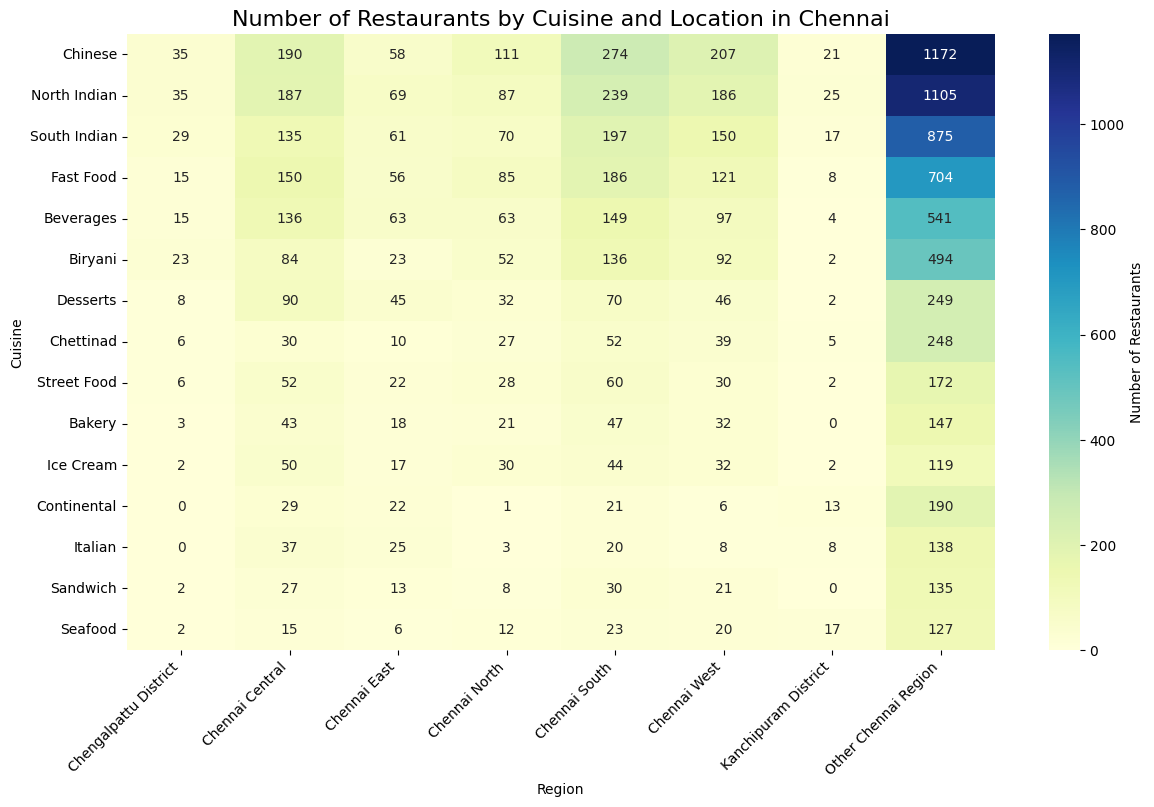

In [76]:
# Step 8: Plot the heatmap
plt.figure(figsize=(14,8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Number of Restaurants'})
plt.title("Number of Restaurants by Cuisine and Location in Chennai", fontsize=16)
plt.xlabel("Region")
plt.ylabel("Cuisine")
plt.xticks(rotation=45, ha="right")
plt.show()

<h3>2.	What is the percentage distribution of restaurants by their Dining Rating categories in Chennai?<h3>

In [80]:
#Define function to categorize
def categorize_rating(rating):
    if rating >= 4.5:
        return "Excellent"
    elif rating >= 4.0:
        return "Very Good"
    elif rating >= 3.5:
        return "Good"
    elif rating >= 3.0:
        return "Average"
    else:
        return "Poor"


In [81]:
#Apply function
df["Rating Category"] = df["Dining Rating"].apply(categorize_rating)

In [82]:
#Calculate percentage distribution
rating_counts = df["Rating Category"].value_counts(normalize=True) * 100
rating_counts = rating_counts.round(2)

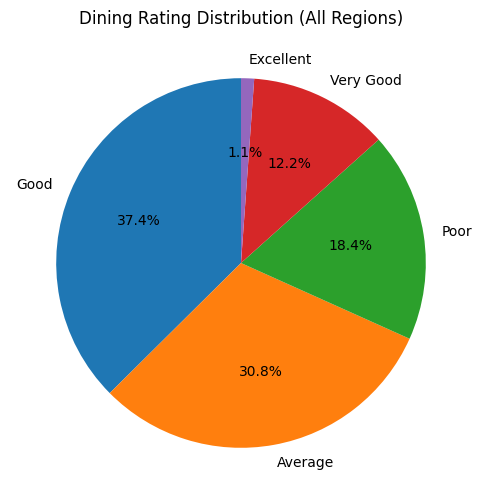

In [83]:
#Pie chart
rating_counts.plot(kind="pie", autopct="%1.1f%%", figsize=(6,6), startangle=90)
plt.ylabel("")
plt.title("Dining Rating Distribution (All Regions)")
plt.show()

<h3>3.	Which are the Top 10 highest rated restaurants serving Biryani cuisine in Chennai?</h3>

In [97]:
#Filter restaurants that serve Biryani
biryani_df = df[df["Cuisine"].astype(str).str.contains("Biryani", case=False, na=False)]

In [101]:
#Sort by rating (highest first)
biryani_top10 = biryani_df.sort_values(by="Dining Rating", ascending=False).head(10)

In [102]:
#Display top 10
biryani_top10[["Name of Restaurant", "Dining Rating", "Cuisine", "Location"]]

,Name of Restaurant,Dining Rating,Cuisine,Location
199,Arabian Kebab Center,4.6,"[Biryani, North Indian, Kebab]",Kodambakkam
116,AlMaza,4.6,"[Arabian, Mughlai, North Indian, Biryani]",Anna Nagar East
154,Nair Mess,4.5,"[South Indian, Biryani]",Triplicane
8757,Yaa Mohaideen Biryani,4.5,"[Biryani, Chinese, Tamil]",Pallavaram
9037,Palmshore,4.5,"[North Indian, Chinese, Arabian, BBQ, Biry...",Medavakkam
9038,Palmshore,4.4,"[North Indian, Chinese, Arabian, BBQ, Biry...",Ramapuram
1,Sukkubhai Biriyani,4.4,"[Biryani, North Indian, Mughlai, Desserts, ...",Alandur
283,Shiraz Art Cafe,4.4,"[Continental, Parsi, Biryani, Iranian]",Neelangarai
47,Palmshore,4.4,"[North Indian, Chinese, Arabian, BBQ, Biry...",Egmore
96,Urban Spatula,4.4,"[Continental, Seafood, Biryani, Italian, N...",Anna Nagar West


<h3>4.	Which restaurants offer both Home Delivery and Indoor Seating in Chennai, and which among them have the highest Dining Rating?</h3>

In [104]:
#Filter restaurants that have both Home Delivery and Indoor Seating
home_indoor_df = df[
    df["Features"].astype(str).str.contains("Home Delivery", case=False, na=False) &
    df["Features"].astype(str).str.contains("Indoor Seating", case=False, na=False)
]

In [105]:
#Sort them by Dining Rating (highest first)
home_indoor_sorted = home_indoor_df.sort_values(by="Dining Rating", ascending=False)

In [106]:
#View the top results
top_restaurants = home_indoor_sorted[["Name of Restaurant", "Location", "Dining Rating", "Features"]]

In [108]:
top_restaurants.head(10)

,Name of Restaurant,Location,Dining Rating,Features
57,Brownie Heaven,Royapettah,4.9,"['Home Delivery', 'Indoor Seating', 'Desserts ..."
184,Gossip Fusion Bistro,Kanathur,4.9,"['Breakfast', 'Home Delivery', 'Free Parking',..."
219,Prems Graama Bhojanam,Adyar,4.9,"['Home Delivery', 'Vegetarian Only', 'Indoor S..."
105,Bhangra,"Mayajaal Multiplex, Kanathur",4.9,"['Breakfast', 'Home Delivery', 'Mall Parking',..."
192,Kabab Corner,Egmore,4.9,"['Home Delivery', 'Indoor Seating', 'Catering ..."
155,The Sandwich Shop,West Mambalam,4.9,"['Home Delivery', 'Vegetarian Only', 'Bulk Ord..."
195,The Marina,Nungambakkam,4.8,"['Home Delivery', 'Indoor Seating', 'Table res..."
163,Momo Sa-Khang by Kailash Kitchen,Choolaimedu,4.8,"['Home Delivery', 'Free Parking', 'Indoor Seat..."
59,Mezze,Alwarpet,4.7,"['Home Delivery', 'Indoor Seating']"
250,Benjarong,Alwarpet,4.7,"['Home Delivery', 'Table booking recommended',..."


<h3>5.	Which locations have the highest rated restaurants for each Cuisine type in Chennai?</h3>

In [110]:
#Find the highest rated restaurant per Cuisine & Location
max_ratings = df_exploded.groupby(["Cuisine", "Location"], as_index=False)["Dining Rating"].max()

In [111]:
#For each Cuisine, get the location with the highest Dining Rating
best_locations = max_ratings.loc[max_ratings.groupby("Cuisine")["Dining Rating"].idxmax()]

What happens here?

max_ratings.groupby("Cuisine") → groups only by Cuisine now.

["Dining Rating"].idxmax() → finds the row index with the highest rating for each cuisine.

.loc[...] → picks those rows from max_ratings.

📌 Example:
If Biryani’s best ratings across locations are:

Pallavaram → 4.3

Alandur → 4.4
We pick Alandur because it’s the highest.

In [115]:
#Add restaurant name for that location
best_with_name = (
    df_exploded
    .sort_values(["Cuisine", "Dining Rating"], ascending=[True, False])
    .drop_duplicates(subset=["Cuisine"])
    [["Cuisine", "Location", "Name of Restaurant", "Dining Rating"]]
    .reset_index(drop=True)
)

Why this works
sort_values → Puts the highest rating for each Cuisine at the top.

drop_duplicates(subset=["Cuisine"]) → Keeps only the first row per Cuisine (highest rating due to sorting).

Selects only the columns you care about in the final output.

📌 Result:
Same output as your multi-step version — but much shorter and easier to read.

In [116]:
best_with_name

,Cuisine,Location,Name of Restaurant,Dining Rating
0,American,Alwarpet,Pumpkin Tales,4.5
1,Andhra,"Crowne Plaza Chennai Adyar Park, Alwarpet",Dakshin - Crowne Plaza Chennai Adyar Park,4.6
2,Arabian,Anna Nagar East,AlMaza,4.6
3,Asian,"Phoenix Market City, Velachery",Mainland China,4.6
4,BBQ,Medavakkam,Palmshore,4.5
...,...,...,...,...
85,Thai,Kotturpuram,Soy Soi,4.7
86,Tibetan,Velachery,Dallay,4.2
87,Turkish,Nungambakkam,Kebapci,4.3
88,Vietnamese,Kotturpuram,Soy Soi,4.7


<h3>6.	What is the average price for two people at the highest rated restaurant for each Cuisine in Chennai?</h3>

In [117]:
#Get the highest-rated restaurant for each cuisine
best_per_cuisine = (
    df_exploded
    .sort_values(["Cuisine", "Dining Rating"], ascending=[True, False])
    .drop_duplicates(subset=["Cuisine"])
)

In [119]:
#Calculate average price for two
avg_price = best_per_cuisine.groupby("Cuisine", as_index=False)["Price for 2"].mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_680\1134824076.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




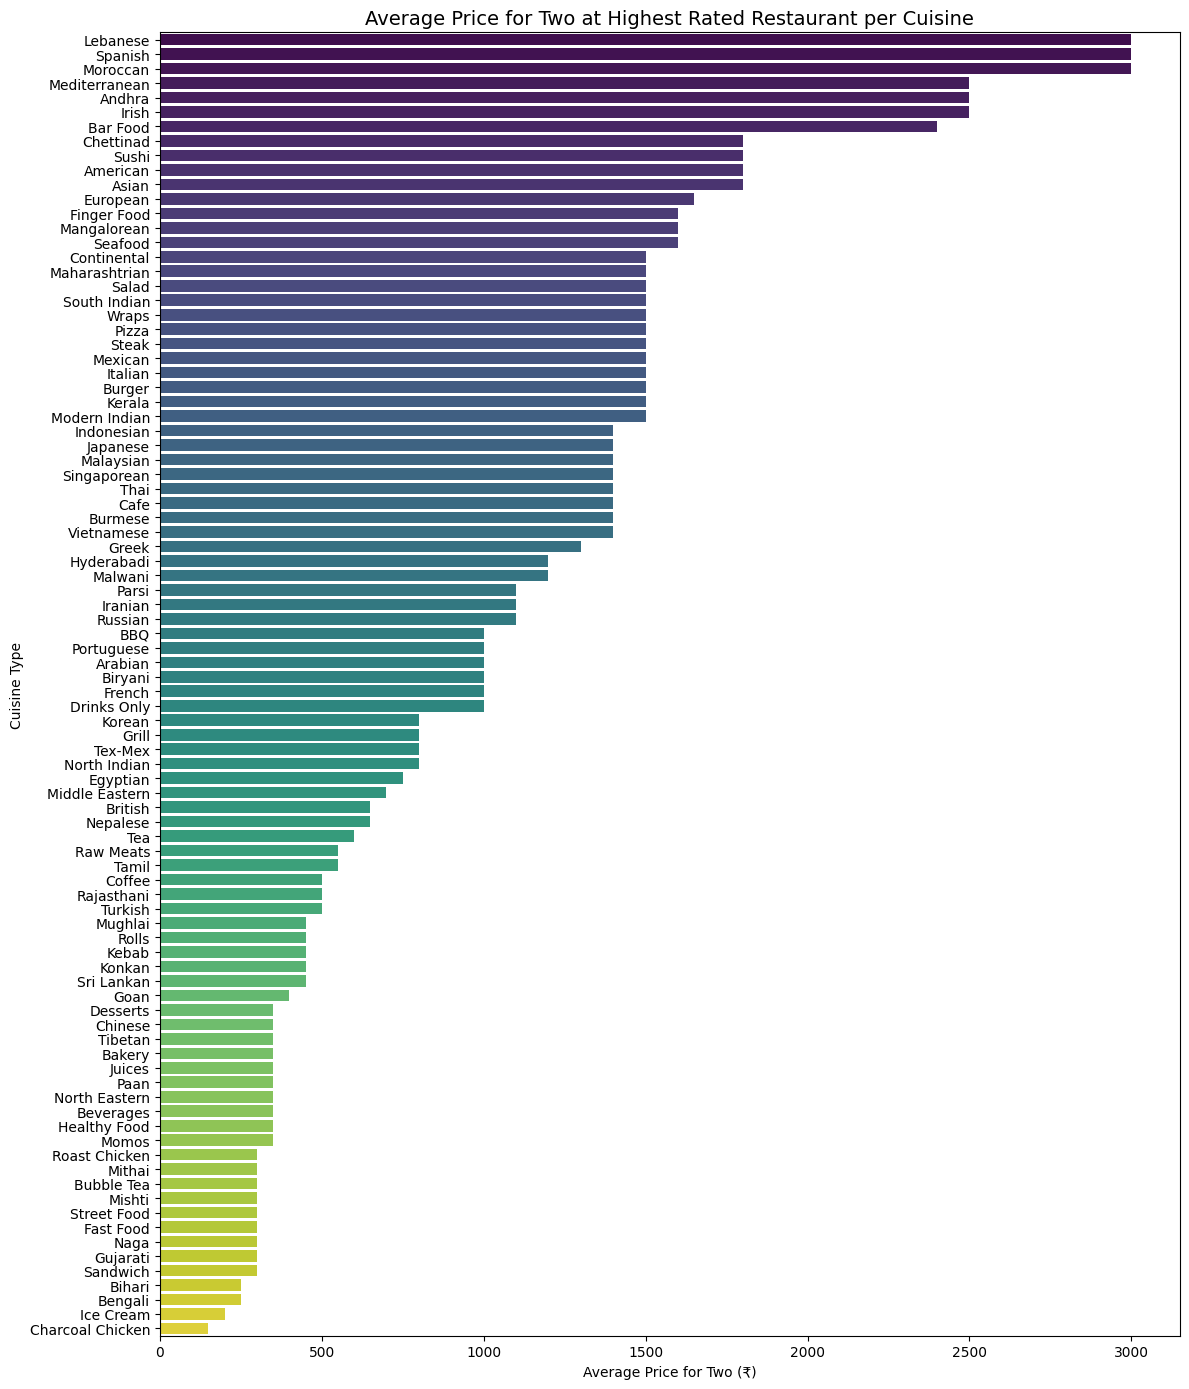

In [124]:
# BarPlot
plt.figure(figsize=(12, 14))
sns.barplot(
    data=avg_price.sort_values("Price for 2", ascending=False),
    x="Price for 2",
    y="Cuisine",
    palette="viridis"
)

plt.title("Average Price for Two at Highest Rated Restaurant per Cuisine", fontsize=14)
plt.xlabel("Average Price for Two (₹)")
plt.ylabel("Cuisine Type")
plt.tight_layout()
plt.show()

<h3>7.	Which locations have the largest number of Chinese cuisine restaurants in Chennai?</h3>

In [125]:
# Filter for Chinese cuisine
chinese_df = df_exploded[df_exploded["Cuisine"].str.contains("Chinese", case=False, na=False)]

In [126]:
# Count restaurants per location
chinese_count = chinese_df["Location"].value_counts().reset_index()
chinese_count.columns = ["Location", "Count"]

C:\Users\HP\AppData\Local\Temp\ipykernel_680\4294646623.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




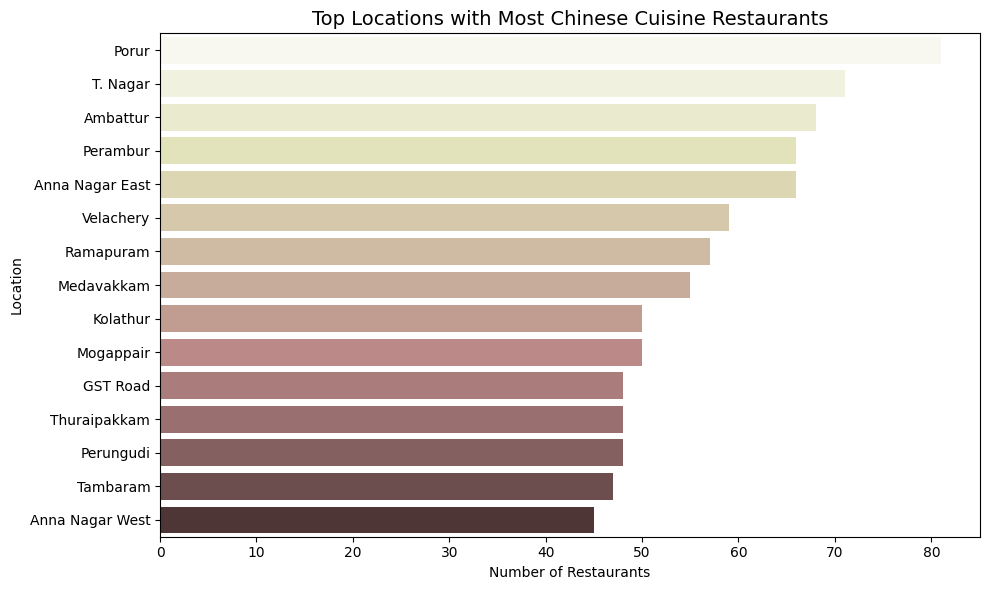

In [128]:
# Plot top 15 locations
plt.figure(figsize=(10, 6))
sns.barplot(
    data=chinese_count.head(15),
    x="Count",
    y="Location",
    palette="pink_r"
)

plt.title("Top Locations with Most Chinese Cuisine Restaurants", fontsize=14)
plt.xlabel("Number of Restaurants")
plt.ylabel("Location")
plt.tight_layout()
plt.show()

<h3>8.	Is there a correlation between Price for 2 and Dining Rating for different Cuisine categories in Chennai?</h3>

C:\Users\HP\AppData\Local\Temp\ipykernel_680\2283695785.py:23: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



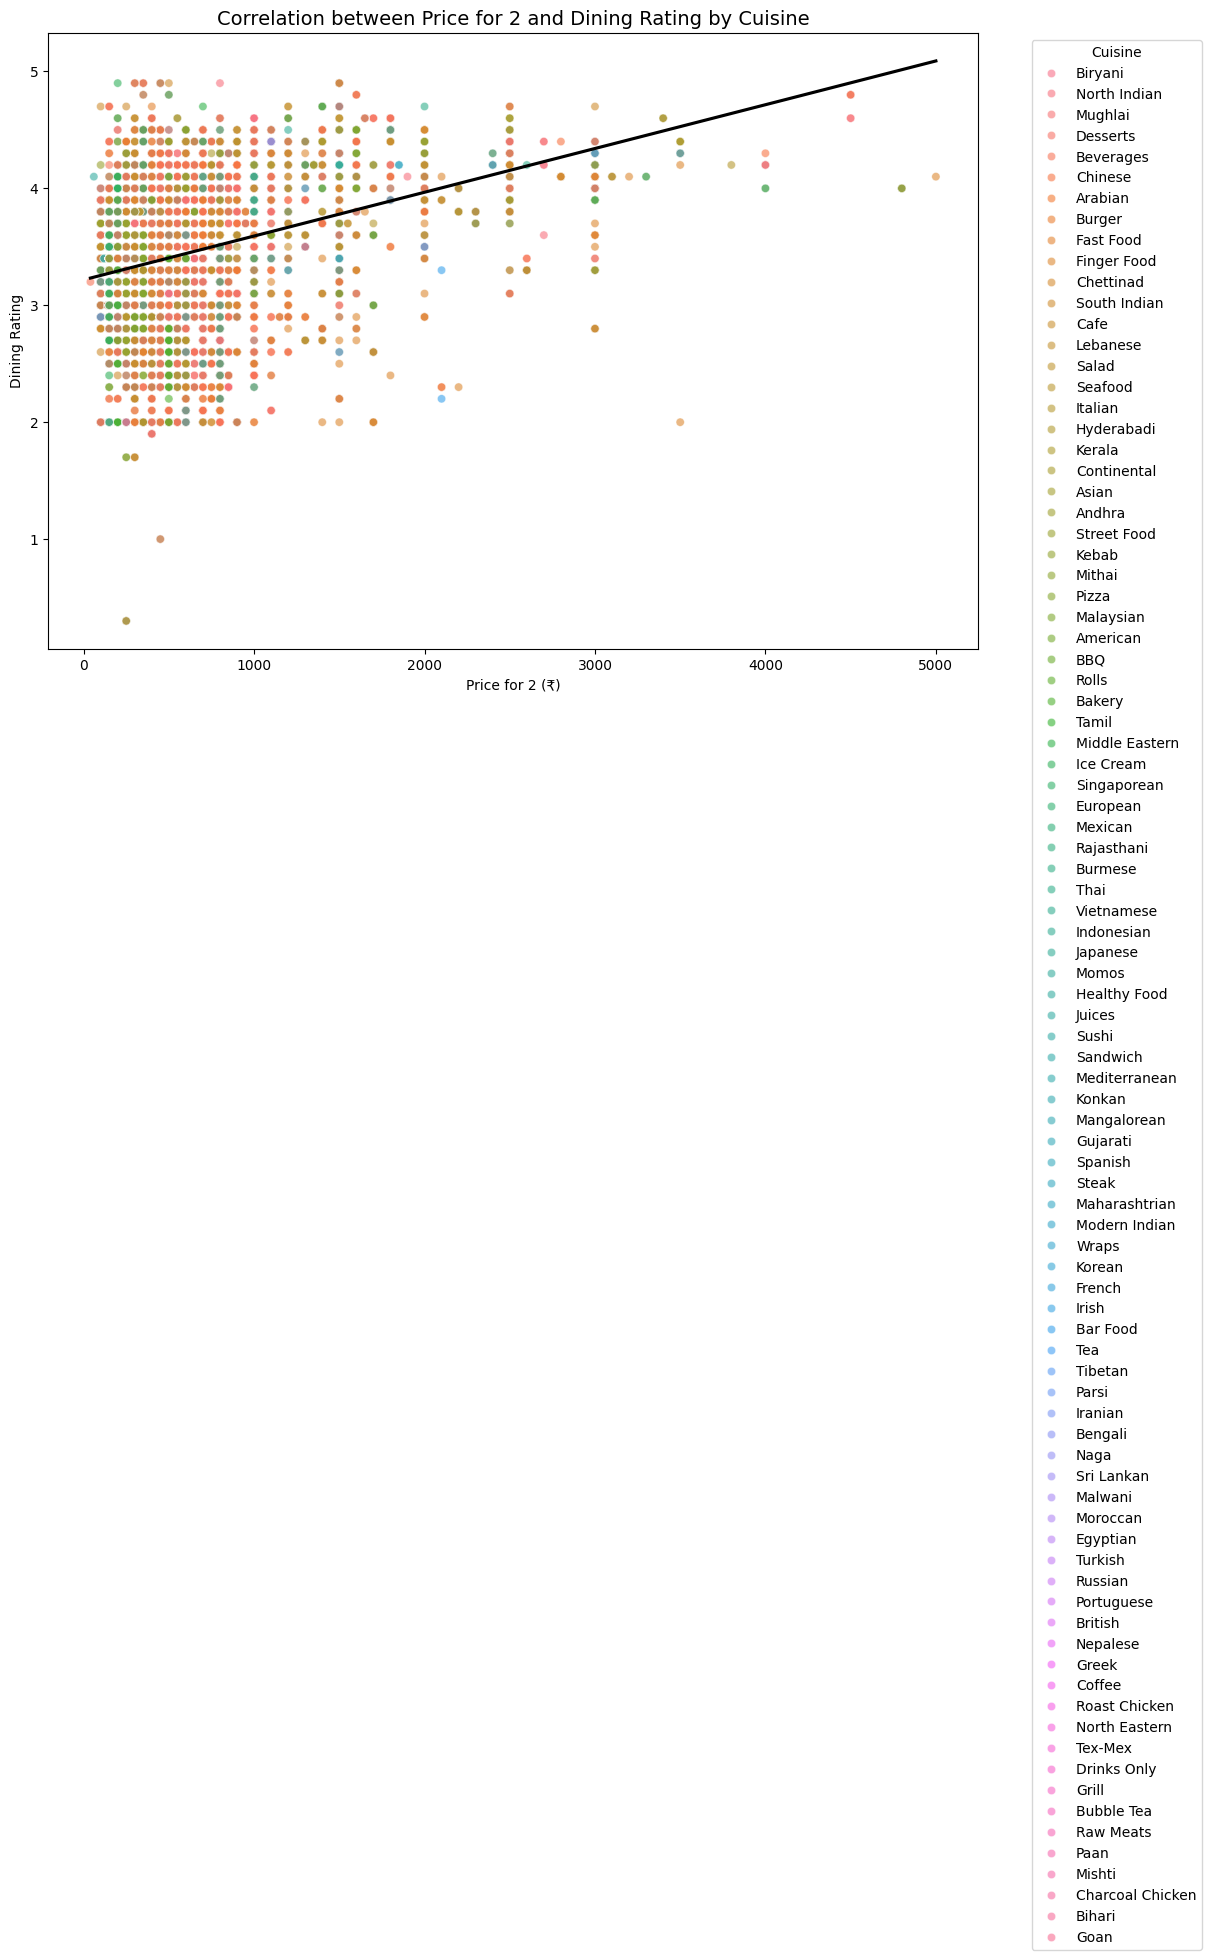

In [132]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_exploded,
    x="Price for 2",
    y="Dining Rating",
    hue="Cuisine",
    alpha=0.6
)

sns.regplot(
    data=df_exploded,
    x="Price for 2",
    y="Dining Rating",
    scatter=False,
    color="black",
    ci=None
)

plt.title("Correlation between Price for 2 and Dining Rating by Cuisine", fontsize=14)
plt.xlabel("Price for 2 (₹)")
plt.ylabel("Dining Rating")
plt.legend(title="Cuisine", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

<h3>9.	Does the delivery rating vary significantly across different locations in Chennai></h3>

In [133]:
# Get top 10 locations by number of restaurants
top_locations = (
    df["Location"]
    .value_counts()
    .head(10)
    .index
)


In [134]:
# Filter to only these locations
df_top_loc = df[df["Location"].isin(top_locations)]

C:\Users\HP\AppData\Local\Temp\ipykernel_680\1915968521.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




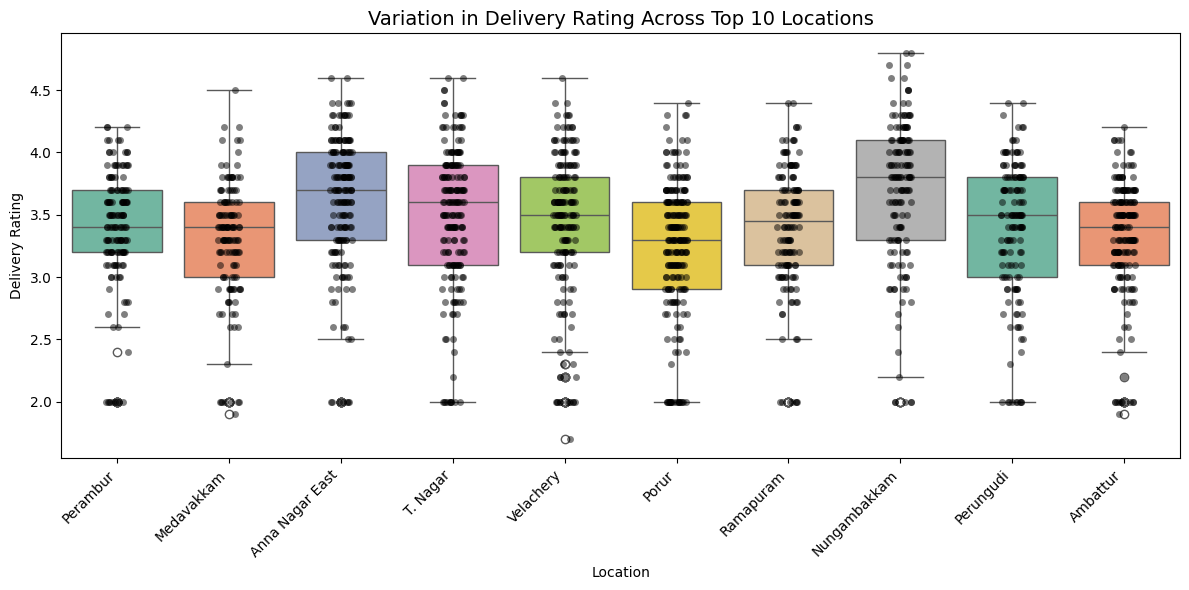

In [135]:
# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_top_loc,
    x="Location",
    y="Delivery Rating",
    palette="Set2"
)

sns.stripplot(
    data=df_top_loc,
    x="Location",
    y="Delivery Rating",
    color="black",
    alpha=0.5,
    jitter=True
)

plt.title("Variation in Delivery Rating Across Top 10 Locations", fontsize=14)
plt.xlabel("Location")
plt.ylabel("Delivery Rating")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

<h3>10.	List the affordable restaurants in Chennai with a Dining Rating above 4.0.</h3>

In [137]:
# Filter affordable + high-rated restaurants
affordable_high = df[(df["Price for 2"] <= 500) & (df["Dining Rating"] > 4.0)]

In [138]:
# Sort by Dining Rating for better visual order
affordable_high = affordable_high.sort_values(by="Dining Rating", ascending=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_680\2015795439.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




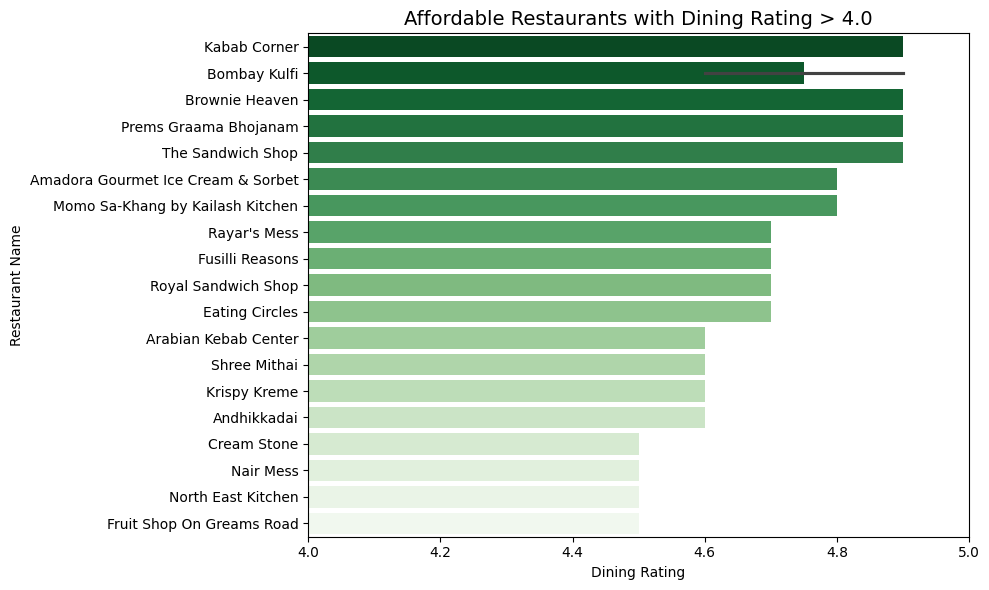

In [139]:
# Plot - Top 20 for readability
plt.figure(figsize=(10, 6))
sns.barplot(
    data=affordable_high.head(20),
    x="Dining Rating",
    y="Name of Restaurant",
    palette="Greens_r"
)

plt.title("Affordable Restaurants with Dining Rating > 4.0", fontsize=14)
plt.xlabel("Dining Rating")
plt.ylabel("Restaurant Name")
plt.xlim(4, 5)
plt.tight_layout()
plt.show()

<h3>11.	Identify the most reliable restaurants in Chennai based on Delivery Rating and number of Delivery Rating Counts.</h3>

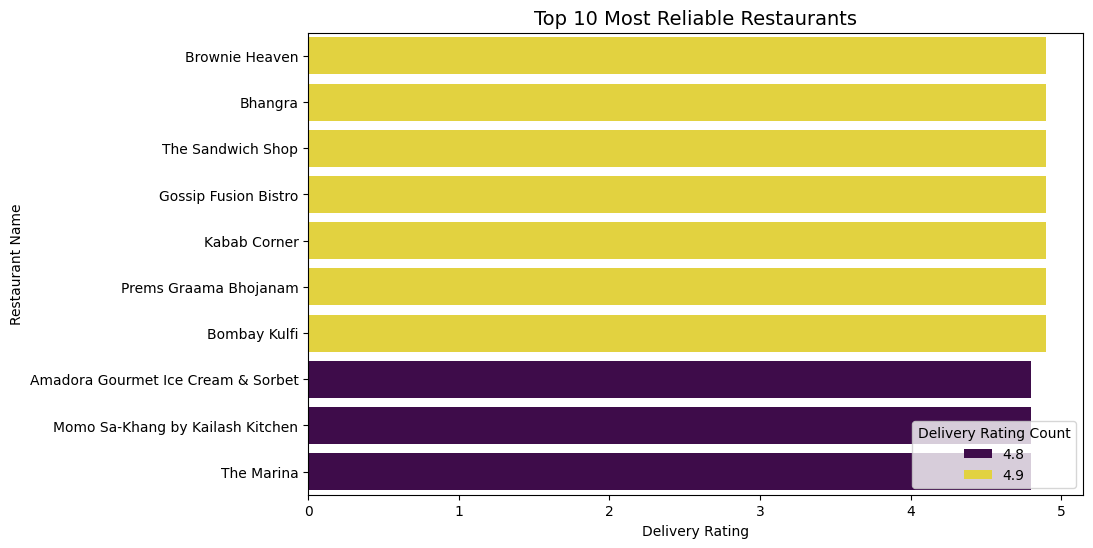

In [150]:
# Select top 10 reliable restaurants
top_reliable = df.sort_values(
    by=["Delivery Rating", "Delivery Rating Count"],
    ascending=[False, False]
).head(10)

# Simple bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_reliable,
    x="Delivery Rating",
    y="Name of Restaurant",
    hue="Delivery Rating Count",
    dodge=False,
    palette="viridis"
)

plt.title("Top 10 Most Reliable Restaurants", fontsize=14)
plt.xlabel("Delivery Rating")
plt.ylabel("Restaurant Name")
plt.legend(title="Delivery Rating Count", loc="lower right")

plt.show()